In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing() 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

## Goals and Commands

#### Goals
1. SVD
2. Truncated SVD
3. PCA



#### Commands
1. la.svd(), la.diagsvd()
2. TruncatedSVD() and related commands


### SVD

In simple terms, SVD allows us to extend ideas of diagonalization, eigenvectors and optimization to non-square matrices. Main trick here is the fact that given any matrix $A$, the matrices $A^TA$ and $AA^T$ are both square, symmetric and positive semidefinite. 

Numpy allows us get SVD directly:

In [2]:
A=np.array([[1,2,3],[4,3,2],[3,5,6],[6,7,1]])
U,S,Vt = la.svd(A)

In [3]:
U

array([[-0.24645785, -0.38814669,  0.08338736, -0.88410815],
       [-0.39583078,  0.11581999, -0.91060816, -0.02639129],
       [-0.58873512, -0.64364128,  0.16066648,  0.46184754],
       [-0.66027834,  0.64934874,  0.37151798, -0.06597822]])

In [4]:
S

array([13.24266949,  4.70674629,  1.21583063])

As you can see, S contains only non-zero singular values. To get the actual Sigma matrix, we can use `la.diagsvd`, where you have to specify the correct size. In our case, it should be 3 by 4:

In [10]:
Sd=la.diagsvd(S,np.shape(A)[0], np.shape(A)[1])
Sd

array([[13.24266949,  0.        ,  0.        ],
       [ 0.        ,  4.70674629,  0.        ],
       [ 0.        ,  0.        ,  1.21583063],
       [ 0.        ,  0.        ,  0.        ]])

In [6]:
Vt

array([[-0.5707049 , -0.69820001, -0.4322183 ],
       [ 0.43348456,  0.19087525, -0.88071435],
       [-0.69741455,  0.68998796, -0.19372549]])

In [11]:
# lets check the product
U@Sd@Vt

array([[1., 2., 3.],
       [4., 3., 2.],
       [3., 5., 6.],
       [6., 7., 1.]])

### Applications of SVD

One of the main uses of SVD for us will be approximation and dimension reduction. 
Approximation part is quite similar to Spectral Decomposition. This time we are decomposing along singular values. If $A$ is a given matrix, then
$$A=\sigma_1{\bf u}_1{\bf v}_1^T+ \cdot + \sigma_r{\bf u}_r{\bf v}_r^T,$$ where $r$ is a rank of $A$. As with spectral decomposition we can drop terms with low sigular values to get an approximation.

To make it a bit more visual and clear, lets try to apply this to an image. We will consider a set of images of a digits. Each image is a grey scale 8x8 image and we will have 1797 of them. Each image is a data point with 64 features (8 by 8 pixels).

The first thing we will do is consider a single image as 8x8 matrix. We will approximate this matrix using the first 3 singular values and see if we can still recognize it. (In essence what we are doing here is image compresion)

In [12]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_digits
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})


In [13]:
X, y = load_digits(return_X_y=True)

# X is the data, y contains labels to indicate what is the actual digit

In [14]:
X.shape, y.shape

0


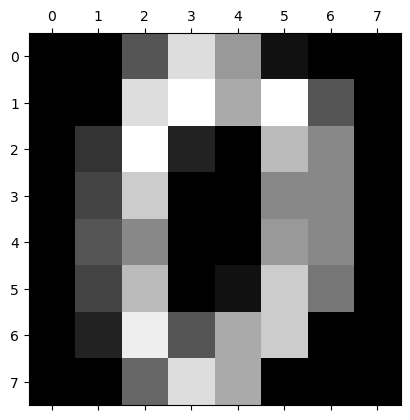

In [15]:
# This is the first image

image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
print(y[0])

In [16]:
U, s, VT = np.linalg.svd(image)

# More general way to create Sigma matrix
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

S

array([[48.31, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 24.96, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 8.02, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 6.03, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 3.53, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.62, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

As you can see, we have 6 non-zero singular values. Now we will reduce our matrix S to contain only 3 singular values:

In [13]:
n_component = 3
Sigma = S[:, :n_component]
Sigma

array([[48.31, 0.00, 0.00],
       [0.00, 24.96, 0.00],
       [0.00, 0.00, 8.02],
       [0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00]])

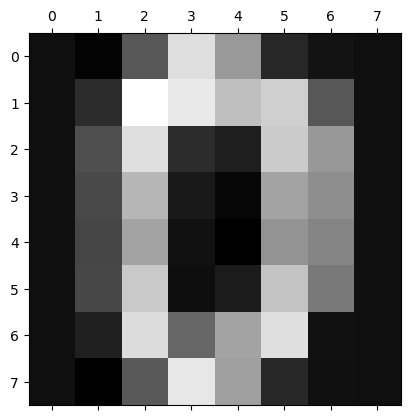

In [14]:
# Now we have our approximation of our original image matrix
VT = VT[:n_component, :]   # reducing VT as well to match Sigma
A = U@Sigma@VT
plt.matshow(A, cmap = 'gray')


Quite similar, but if you look carefully, you will see it isn't identical.

Another way to do it is through Truncated SVD. To do that we can use TruncatedSVD. What it does is it takes main sigular directions as a new basis for a new truncated space (recall diagonalization).

In [15]:
svd = TruncatedSVD(n_components=3)
image_reduced = svd.fit_transform(image)
image_reduced    

array([[10.97, 12.23, -2.21],
       [26.04, 6.82, -0.15],
       [18.73, -7.95, -1.55],
       [14.60, -8.08, -2.15],
       [12.72, -7.84, -2.14],
       [16.19, -8.21, 0.43],
       [20.45, 2.05, 6.54],
       [11.36, 12.85, -2.20]])

image_reduced is just $U \cdot \Sigma$. To get final result we use inverse transform:

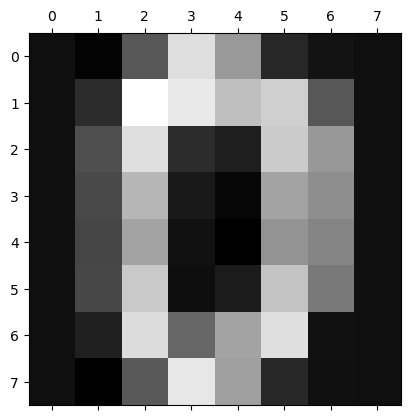

In [16]:
image_reduced=svd.inverse_transform(image_reduced)
plt.matshow(image_reduced, cmap = 'gray')

As you can see we got the same image.

However, Truncated SVD has another very useful application - dimension reduction. Let's look at the whole set of all digits. Each digit represented by 64 values. So in essence each image is a point in a 64 dimensional space. We will reduce that space to 5 dimensional space and see if images are still recognizable. 
To do that we can use TruncatedSVD again.

In [17]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
X_reduced.shape


In [18]:
X_reduced[0]

array([45.86, -1.19, 21.10, -9.49, 13.04])

As you can see first digit is represented by 5 numbers. Clearly, these numbers are no longer pixels. They are in fact some weighted sums of values of all pixels. 

In [22]:
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
image_reduced

array([[0.00, 0.16, 5.15, 12.23, 11.55, 6.63, 1.89, 0.20],
       [-0.00, 1.76, 14.44, 10.70, 5.78, 9.87, 2.49, 0.18],
       [0.00, 4.49, 16.23, 1.02, -2.39, 9.63, 3.80, 0.07],
       [0.00, 5.51, 14.32, 2.29, 1.29, 10.33, 5.47, 0.00],
       [0.00, 4.99, 10.09, 1.37, 1.54, 11.81, 6.33, 0.00],
       [0.01, 2.70, 8.45, -0.15, 0.90, 11.69, 6.05, -0.00],
       [0.01, 0.86, 9.63, 6.38, 6.76, 10.80, 2.68, -0.23],
       [-0.00, 0.16, 5.40, 13.52, 10.88, 3.88, -0.61, -0.48]])

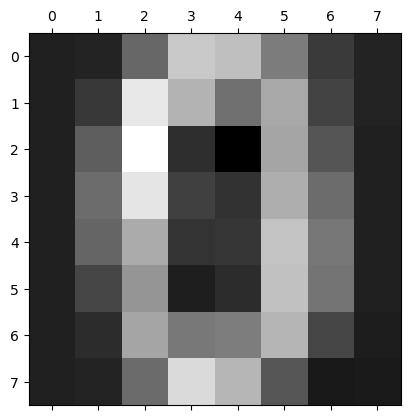

In [23]:
plt.matshow(image_reduced, cmap = 'gray')

### PCA

In essence, PCA is just Truncated SVD that is applied on centered data. By centered data, we mean that all the data is shifted so that the global mean is at the origin. In practice, PCA reduces dimension of data in such a way that we get directions of largest variances (so largest spread of data).

Note that if $A$ contains the centered data and $N$ is the amount of data, then $\frac{1}{N-1}AA^T$ is a covariance matrix containing all variances along main diagonal and covariances everywhere else. It is symetric, positive definite matrix that is just a scalar multiple of $AA^T$. So applying methods of SVD or Truncated SVD is equivalent to finding directions of largest variances (i.e largest spread of data)

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # how many dimensions we want to have
pca.fit(X)

PCA(n_components=3)

In [22]:
X_reduced = pca.transform(X)

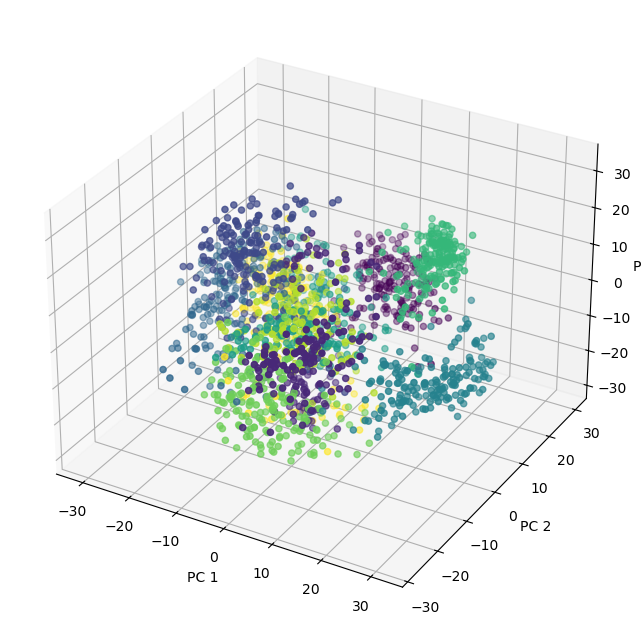

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
  
# creating the plot
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=y)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

In [24]:
print('Explained Variance Ratio')
for i in range(3):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.14890593584062412
PC2: 0.1361877123963526
PC3: 0.11794593763974659


As you can see first three principal values amount only to about 40% of information. Though do note that same color (i.e. same digits) do clump together. If we were trying to get an image recognition algorithm, we would probably want to take more principal values:

In [25]:
pca = PCA(n_components=0.90)   # note that n_components means percentage when it's less than one.
pca_data = pca.fit_transform(X)

print("{} Principal Components are required to explain {}% of the variation in this data.".format(pca.n_components_, 90))

21 Principal Components are required to explain 90% of the variation in this data.
